###Note: 

This project is not based on this project (https://www.kaggle.com/code/tolgahancepel/boston-housing-regression-analysis/notebook). The purpose of this project is to learn machine learning based on other people's data science project.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

###Step 1, Import data and library

**Note:** In this project, I will only use those libraries, in order to practice machine learning skill.
* `from google.colab import drive`
* `import math`
* `import pandas as pd`
* `import numpy as np`
* `import matplotlib.pyplot as plt`

**About Dataset:**

Concerns housing values in suburbs of Boston. (a city in Northeastern United States)

**Note**
* Number of Instances: 506
* Number of Attributes: 13 continuous attributes (including "class"
attribute "MEDV"), 1 binary-valued attribute.
* Missing Attribute Values: None.

**Attribute Information:**
* CRIM = crime rate by town
* ZN = proportion of residential land zoned for lots over
25,000 sq.ft.
* INDUS = proportion of non-retail business acres per town
* CHAS = Charles River dummy variable (= 1 if tract bounds
river; 0 otherwise)
* NOX = nitric oxides concentration (parts per 10 million)
* RM = average number of rooms per dwelling
* AGE = proportion of owner-occupied units built prior to 1940
* DIS = weighted distances to five Boston employment centres
* RAD = index of accessibility to radial highways
* TAX = full-value property-tax rate per \$10,000
* PTRATIO = pupil-teacher ratio by town
* B = $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks
by town
* LSTAT = % lower status of the population
* MEDV = Median value of owner-occupied homes in \$1000's

**Keyword**
* residential (ADJ) = designed for people to live in.
* non-retail business (N) = a business, including an office, warehouse, or other space that does not sell or provide goods or services directly to the ultimate consumer or user.
* tract bounds = the boundaries or limits of a tract of land especially as described by reference to lines and distances between points on the land.
* tract (N) = an area of indefinite extent, typically a large one.
* dummy variable (N) = a variable that takes the values 0 or 1 to indicate the absence or presence of some categorical effect
* dwelling (N) = a house, apartment, or other place of residence.
* prior (ADJ) = existing or coming before in time, order, or importance.
* occupied (ADJ) = (of a building, seat, etc.) being used by someone.
* The weighted arithmetic mean is similar to an ordinary arithmetic mean (the most common type of average), except that instead of each of the data points contributing equally to the final average, some data points contribute more than others. (https://en.wikipedia.org/wiki/Weighted_arithmetic_mean)
* weighted distances = The distance-weighted mean is *a measure of central tendency*, a special case of weighted mean, where weighting coefficient for each data point is computed as the inverse sum of distances between this data point and the other data points[1]. Thus, central observations in a dataset get the highest weights, while values in the tails of a distribution are downweighted. *In other words, data points close to other data points carry more weight than isolated datapoints.* (https://encyclopediaofmath.org/wiki/Distance-weighted_mean)
* Radial highway = a highway leading to or from an urban center.
* pupil = a student in school.
* Median (ADJ) = denoting or relating to a value or quantity lying at the midpoint of a frequency distribution of observed values or quantities

Source of the data set: https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset

In [ ]:
from google.colab import drive

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

path='/content/drive/MyDrive/Project/DataScience/KaggleProject01_BostonHousing_by_TOLGAHANCEPEL/Data/K_RealEstate01_ArslanAli.csv'

df = pd.read_csv(path)
df.astype(float)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0.0,0.561,6.980,89.0,2.0980,3.0,320.0,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0.0,0.561,6.980,76.0,2.6540,3.0,320.0,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0.0,0.561,6.123,98.0,2.9870,3.0,320.0,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0.0,0.561,6.222,34.0,2.5430,3.0,329.0,23.0,343.00,76.00,67.0


###Step 2, Visualize the data

**(1.) Plot and view the data**

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

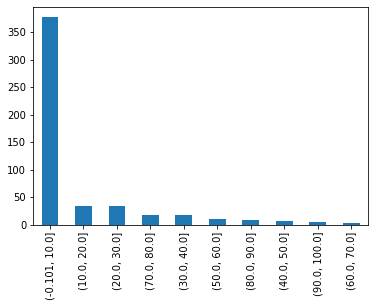

In [ ]:
# This code count the frequency of value
# x axis = value (value of the data)
# y axis = fequency (how often the data have the same value)

space=10
name='ZN'
df[name].value_counts(bins=space)

fig, ax = plt.subplots()
df[name].value_counts(bins=space).plot(ax=ax, kind='bar')

In [ ]:

print('This code indicate the general information about the particular column')
name='ZN'
print(df[name].describe())


print('This code show mean and Standard Deviation of every column')
for i in df.columns:
  print('column name = '+str(i))
  print('mean = '+str(df[i].mean()))
  print('std = '+str(df[i].std()))

This code indicate the general information about the particular column
count    511.000000
mean      11.252446
std       23.234838
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64
This code show mean and Standard Deviation of every column
column name = CRIM
mean = 3.5841385772994134
std = 8.564433333509855
column name = ZN
mean = 11.252446183953033
std = 23.234838381032187
column name = INDUS
mean = 11.151095890410957
std = 6.828174588309387
column name = CHAS
mean = 0.0684931506849315
std = 0.25283777534076946
column name = NOX
mean = 0.5547567514677103
std = 0.11530992214681604
column name = RM
mean = 6.287588932806324
std = 0.7038016463619768
column name = AGE
mean = 68.61624266144814
std = 28.09913037471996
column name = DIS
mean = 3.783875929549902
std = 2.09863136242663
column name = RAD
mean = 9.4853228962818
std = 8.688468797353902
column name = TAX
mean = 407.440313111546
std = 167.9035316492596
column

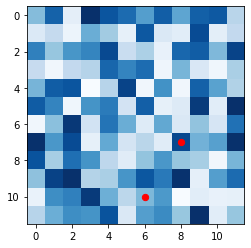

In [ ]:
# reference: https://stackoverflow.com/questions/29155324/how-can-i-color-specific-pixels-in-matplotlib-imshow
matrix = np.random.rand(12,12)
matri = np.random.rand(12,12)
plt.imshow(matri, interpolation='nearest', cmap=plt.cm.Blues)
plt.scatter([6,8], [10,7], color='red', s=40)
plt.show()

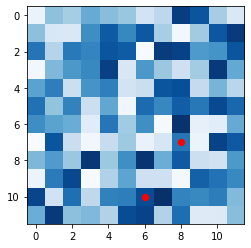

In [ ]:
matrix = np.random.rand(12,12)
matri = np.random.rand(12,12)
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.scatter([6,8], [10,7], color='red', s=40)
plt.show()

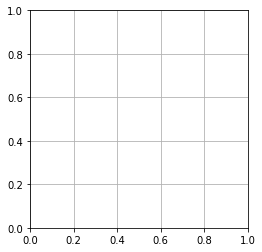

In [ ]:
# This graph indicates the relationship between every columns
plt.axes().set_aspect('equal')
plt.grid()